In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder , OrdinalEncoder, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
df= pd.read_csv(r'e:\DATA ANALYSIS\DataMites\DM\PROJECTS\GAME AI - WINNER PREDICTION\pubg.csv')

### BASIC CHECK / Understanding Data


In [4]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [5]:
# droppping the columns that are not needed
df.drop(['Id', 'groupId', 'matchId'], axis=1, inplace=True)

In [6]:
df

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,1029,0,0,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,0,4,180.40,1,1,2,11,0,2,1,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [7]:
df.replace('?', np.nan, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int64  
 1   boosts           int64  
 2   damageDealt      float64
 3   DBNOs            int64  
 4   headshotKills    int64  
 5   heals            int64  
 6   killPlace        int64  
 7   killPoints       int64  
 8   kills            int64  
 9   killStreaks      int64  
 10  longestKill      float64
 11  matchDuration    int64  
 12  matchType        object 
 13  maxPlace         int64  
 14  numGroups        int64  
 15  rankPoints       int64  
 16  revives          int64  
 17  rideDistance     float64
 18  roadKills        int64  
 19  swimDistance     float64
 20  teamKills        int64  
 21  vehicleDestroys  int64  
 22  walkDistance     float64
 23  weaponsAcquired  int64  
 24  winPoints        int64  
 25  winPlacePerc     float64
dtypes: float64(6), int64(19), object(1)
memory

In [9]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [10]:
df.describe(include='O')

,matchType
count,4446966
unique,16
top,squad-fpp
freq,1756186


In [11]:
# Check for missing values
df.isnull().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [12]:
df.loc[df['winPlacePerc'].isnull(), 'winPlacePerc'] = df['winPlacePerc'].mean()

In [13]:
df.isnull().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [14]:

# differentiate between categorical and numerical columns
num_col = [
    'assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
    'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
    'matchDuration', 'maxPlace', 'rankPoints', 'revives', 'rideDistance',
    'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
    'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc'  # Target
]
cat_col = [
    'matchType'
]

### EDA 


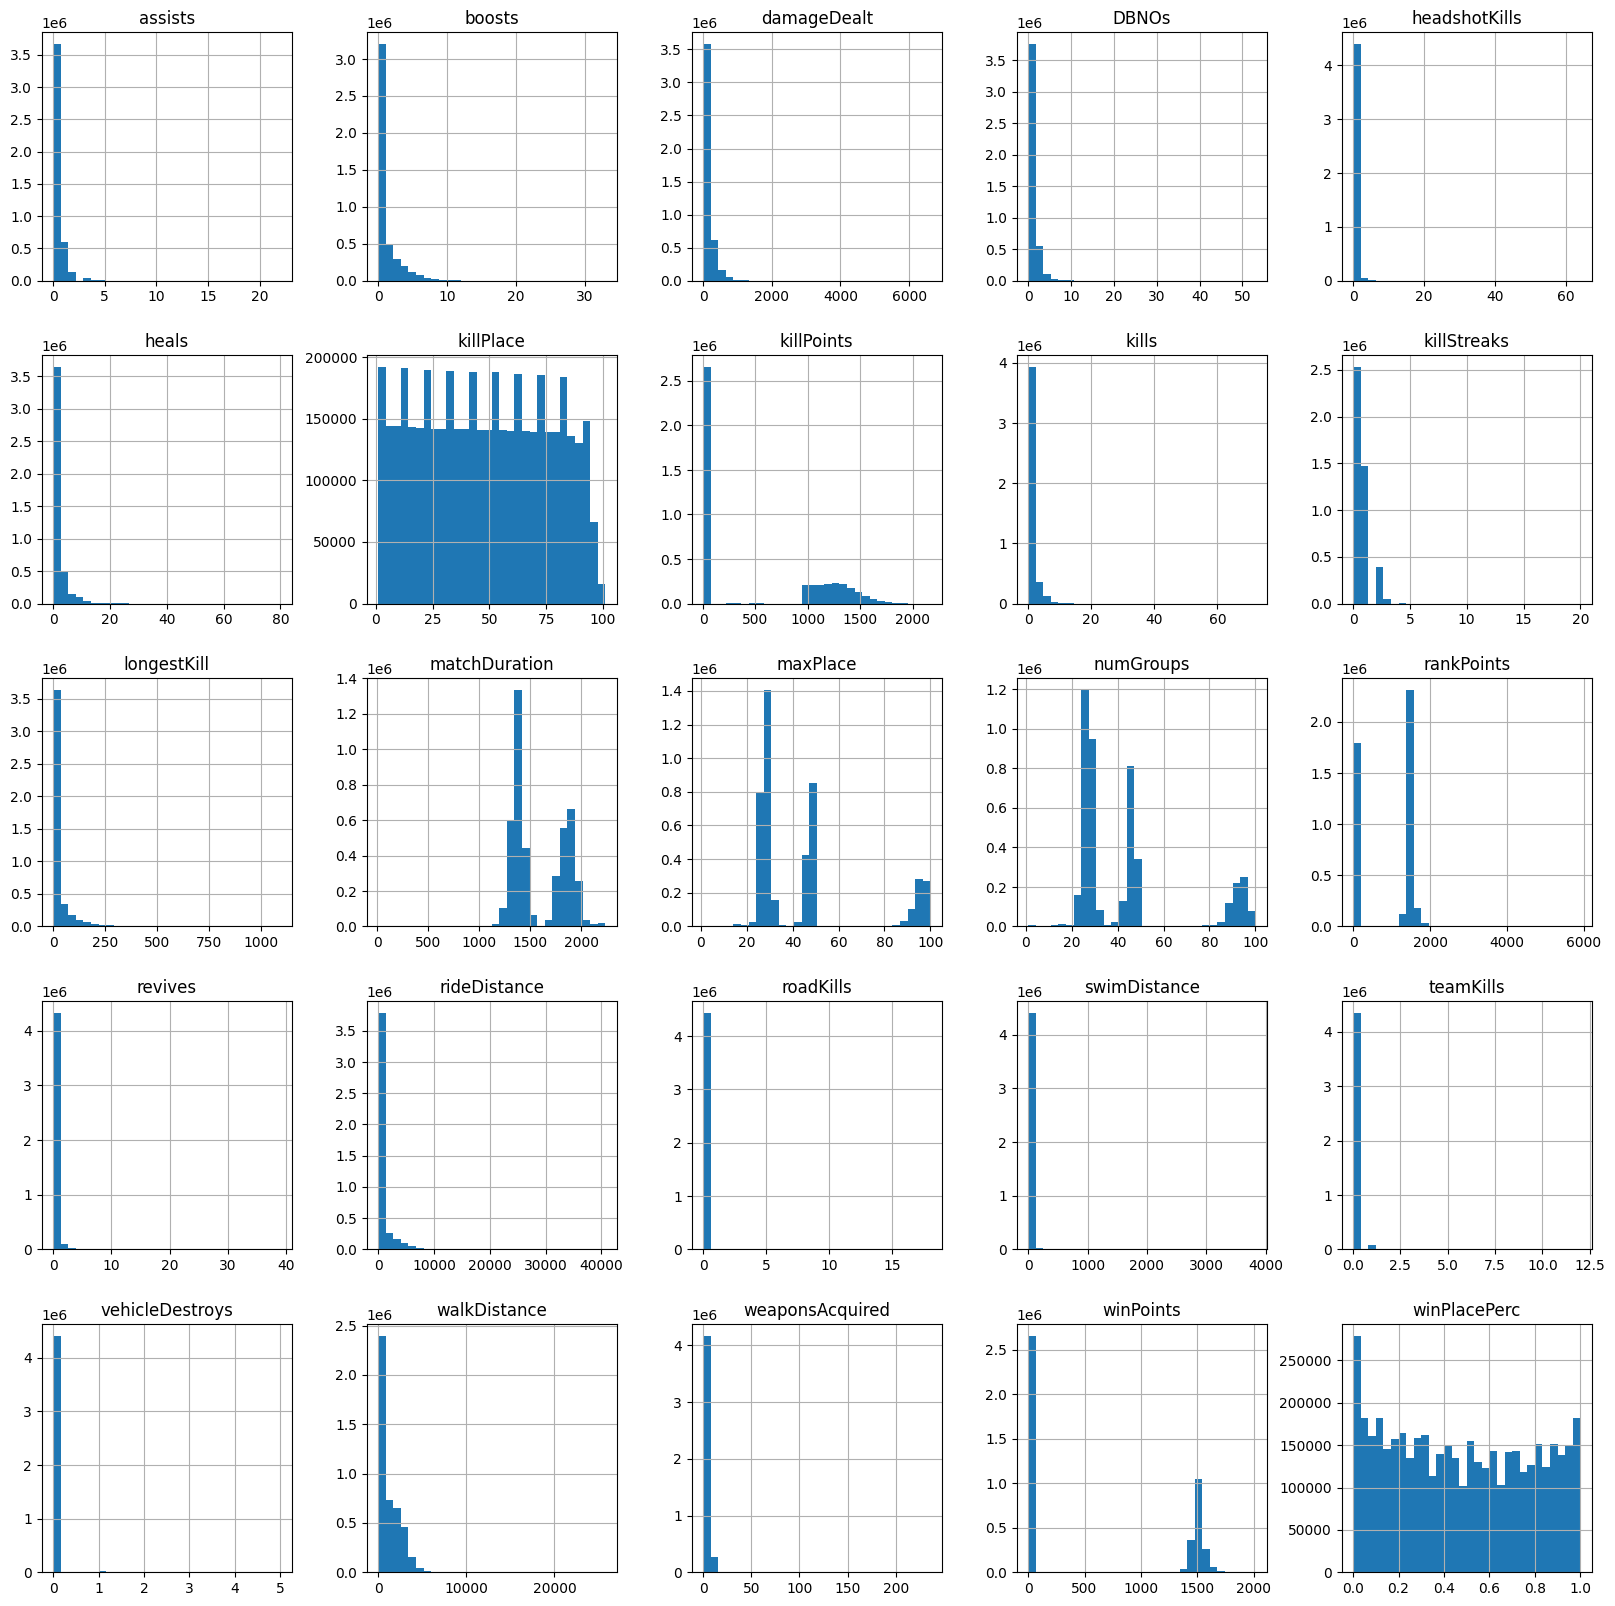

In [15]:
df.hist(figsize=(20, 20), bins=30)
plt.show()

<Axes: xlabel='winPlacePerc', ylabel='Count'>

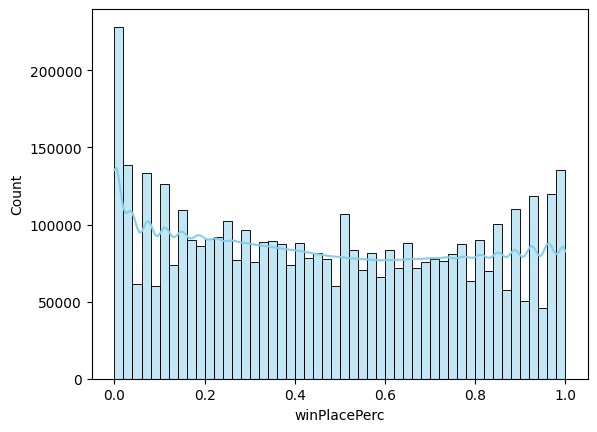

In [16]:
sns.histplot(df['winPlacePerc'], kde=True, bins=50, color='skyblue')

<Axes: >

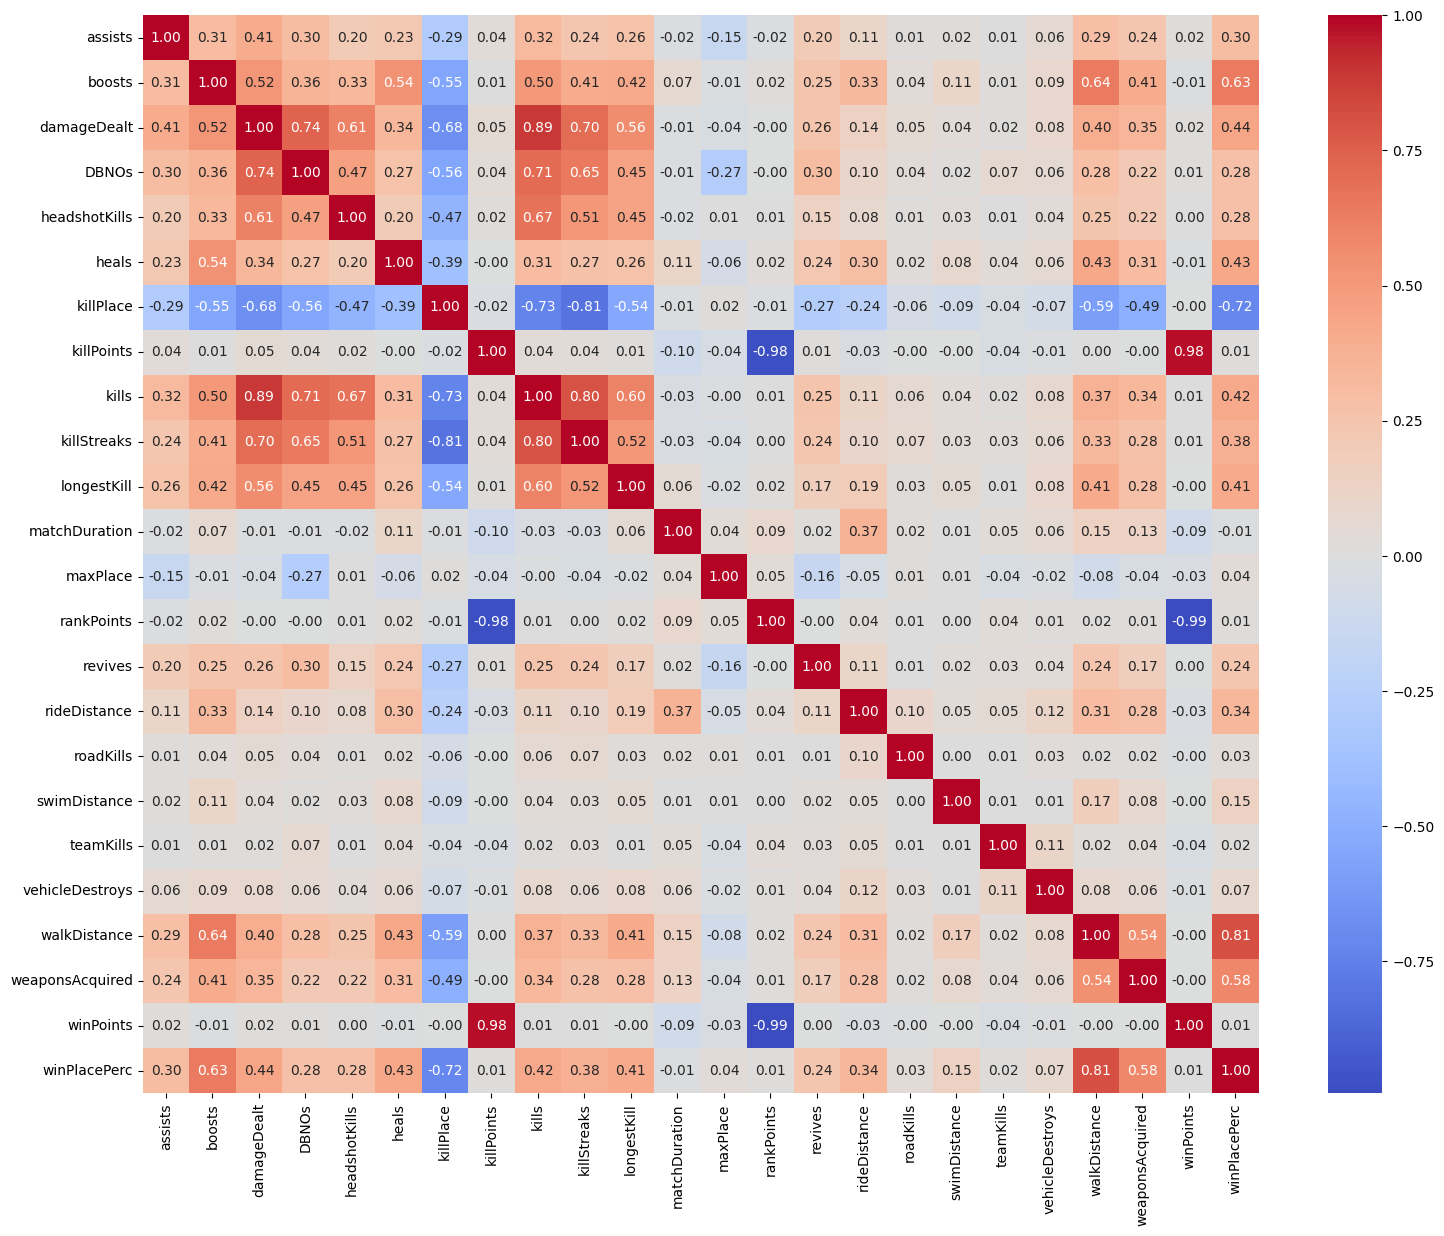

In [17]:
plt.figure(figsize=(18,14))
corr = df[num_col].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

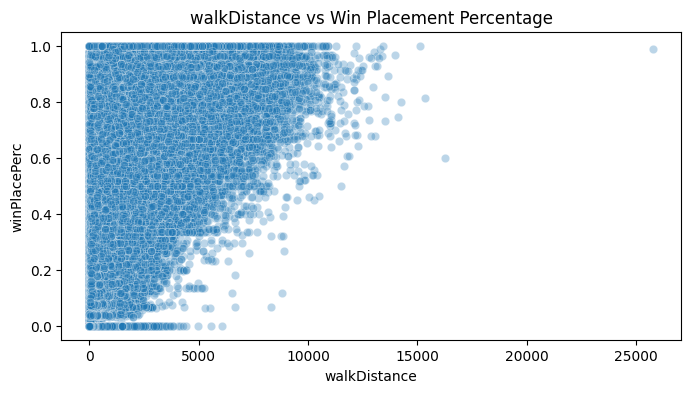

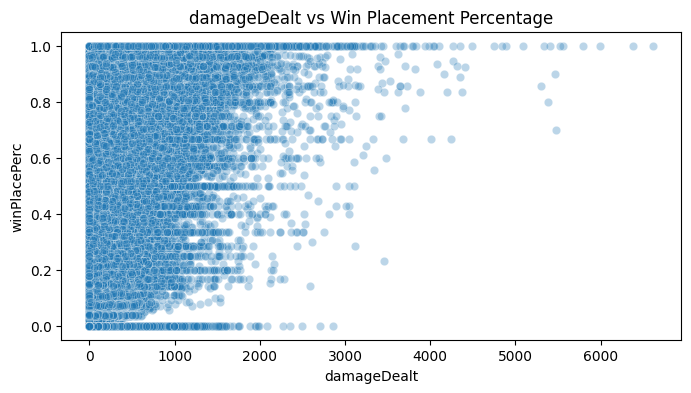

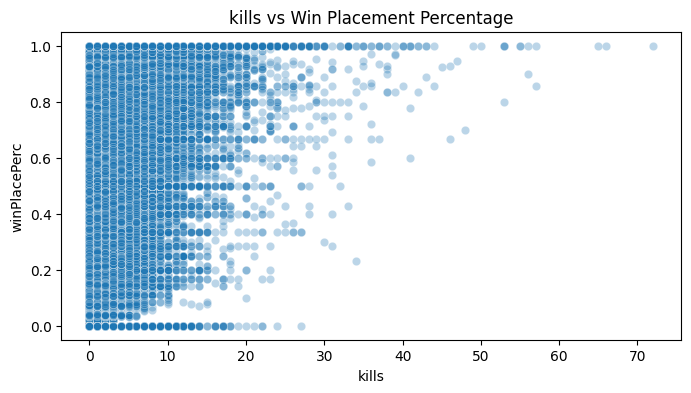

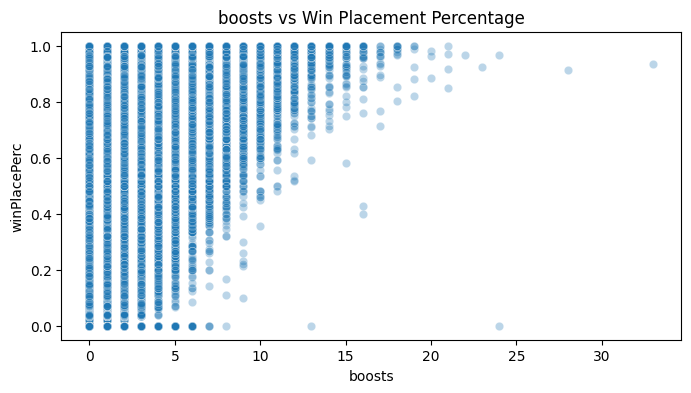

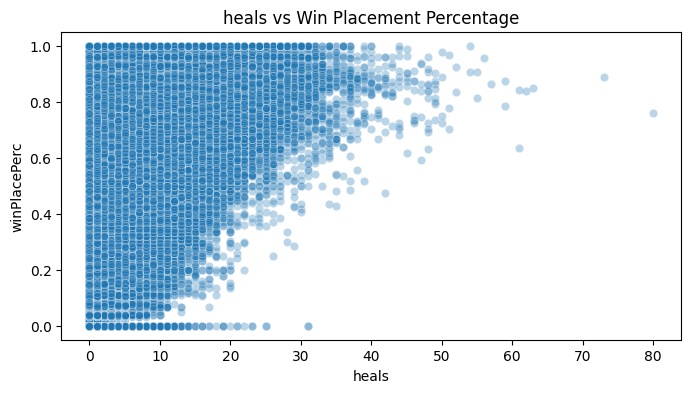

In [18]:
top_predictors = ['walkDistance', 'damageDealt', 'kills', 'boosts', 'heals']

for col in top_predictors:
    plt.figure(figsize=(8,4))
    sns.scatterplot(data=df, x=col, y='winPlacePerc', alpha=0.3)
    plt.title(f'{col} vs Win Placement Percentage')
    plt.show()


### OUTLIERS REMOVAL


In [19]:
df[num_col]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,1029,0,0,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,0,4,180.40,1,1,2,11,0,2,1,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


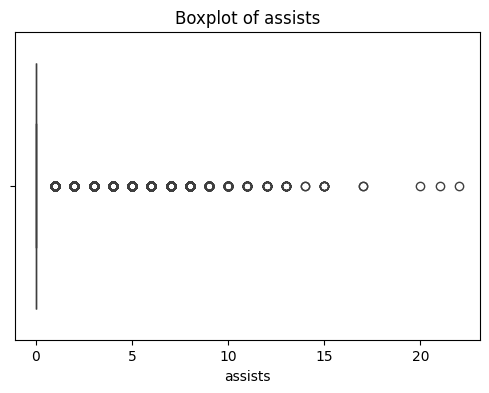

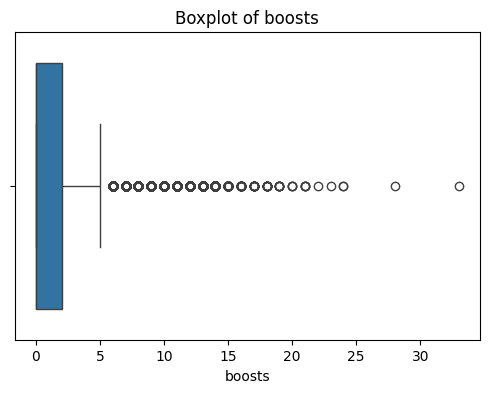

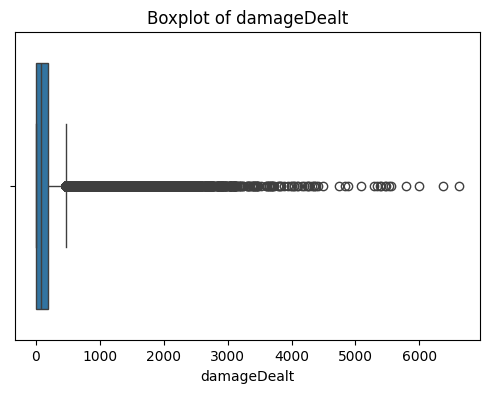

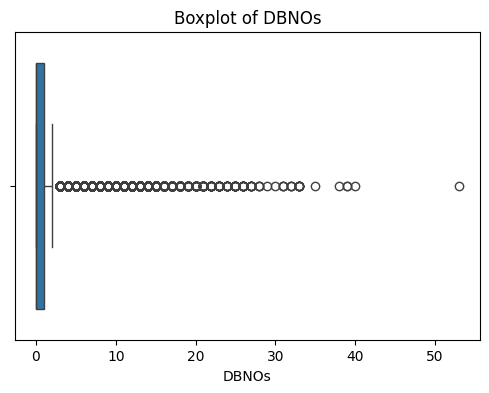

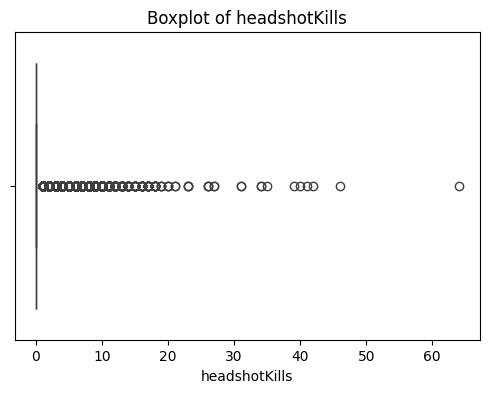

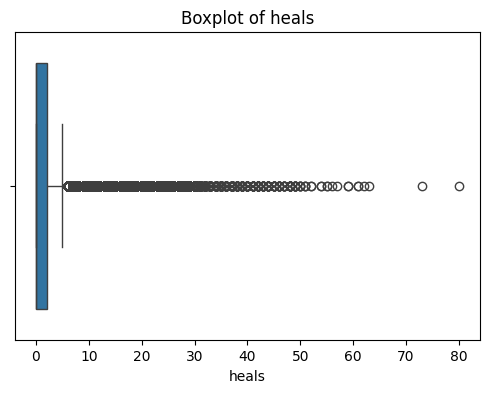

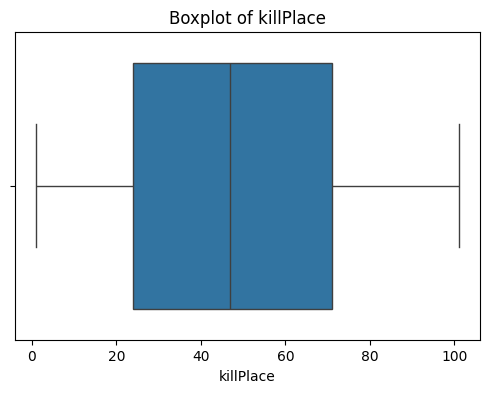

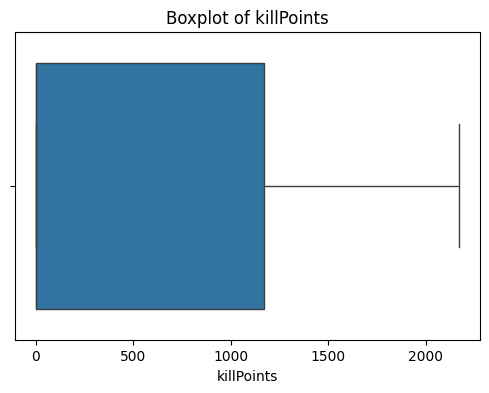

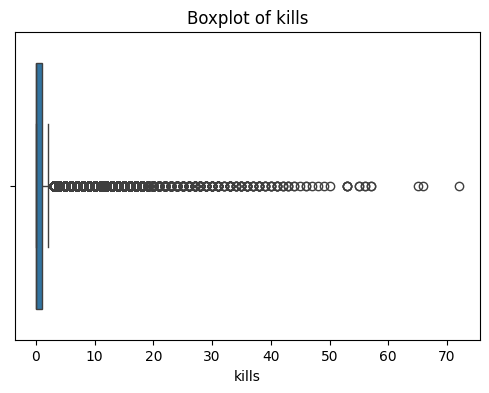

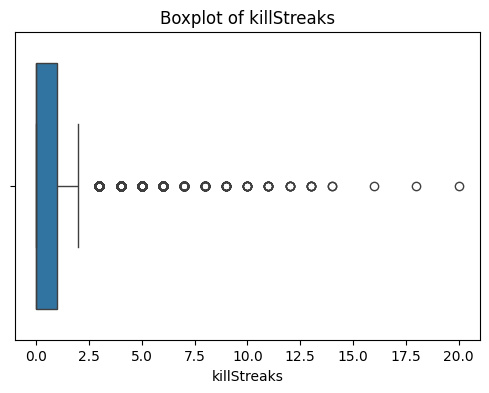

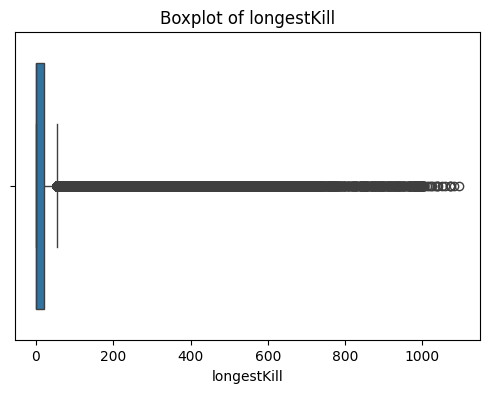

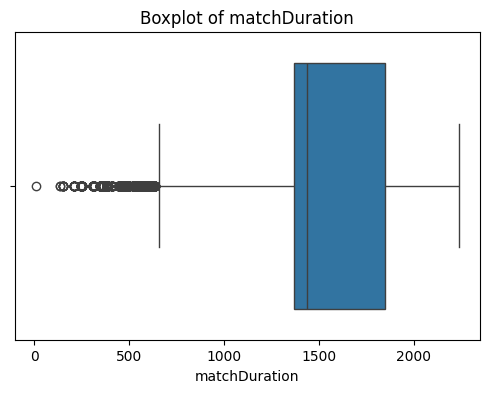

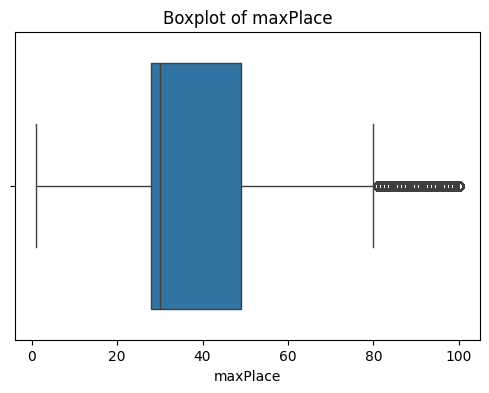

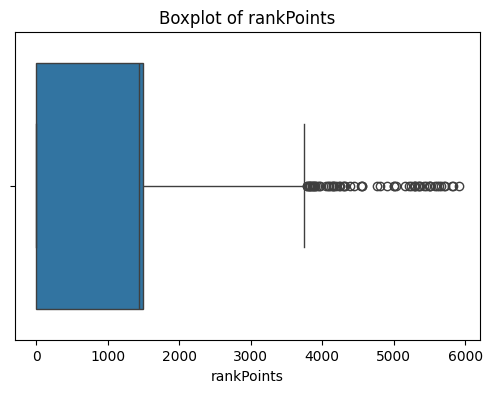

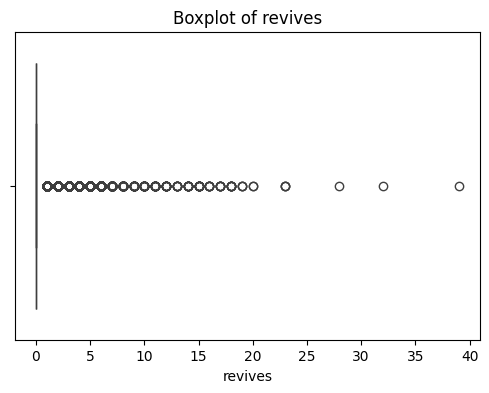

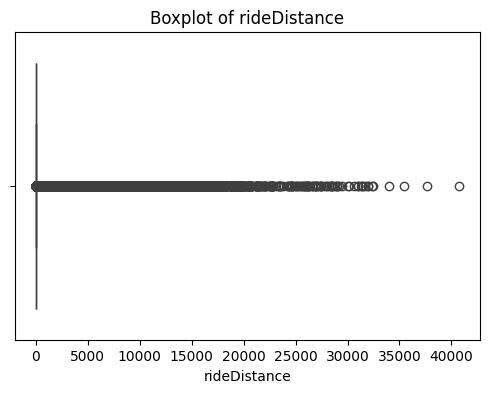

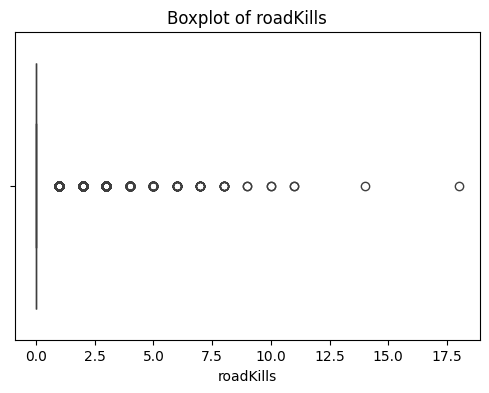

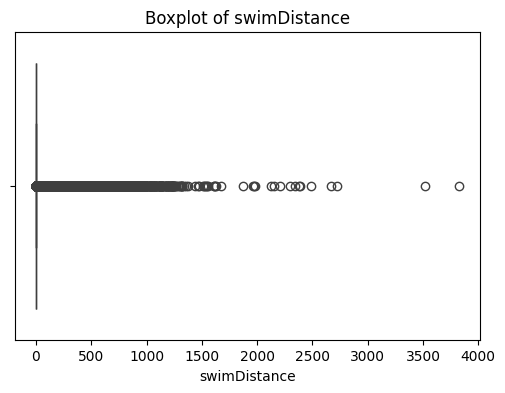

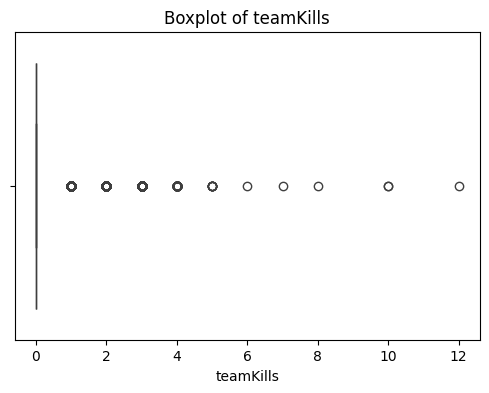

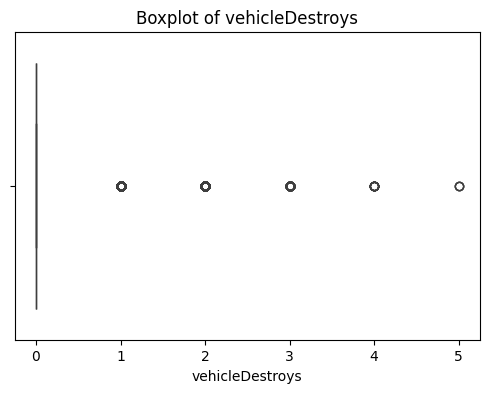

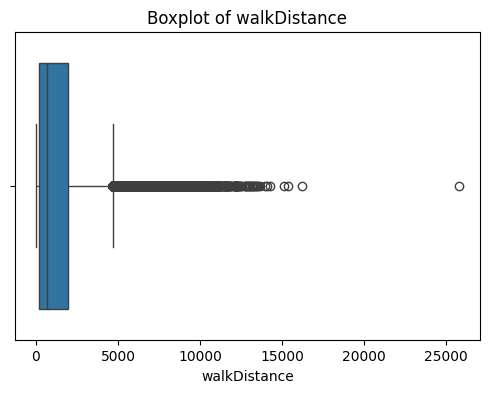

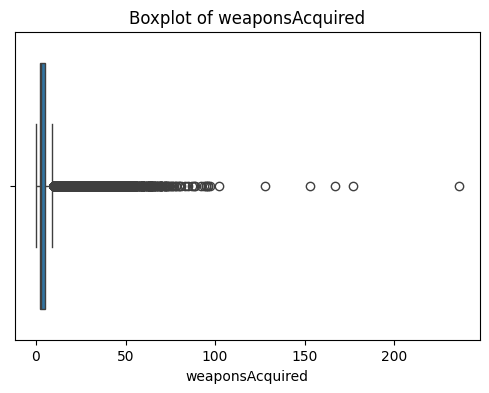

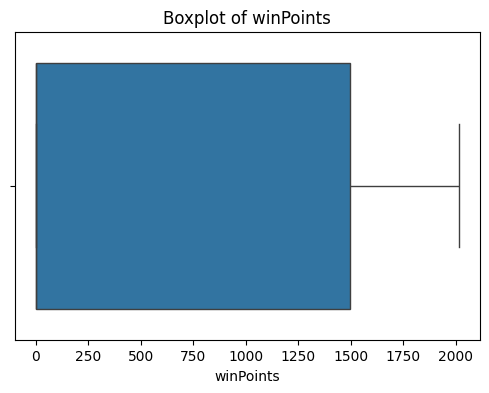

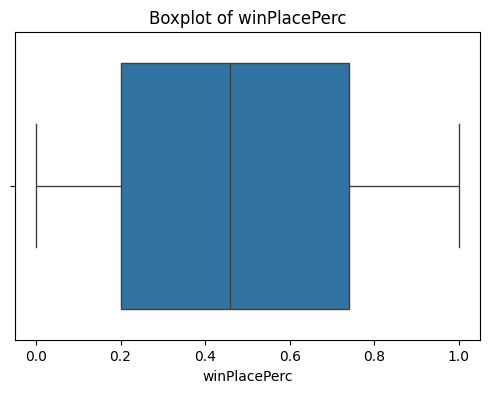

In [20]:
# Visualize outliers for each numerical column using boxplots
for col in num_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [21]:
# lets remove outliers
Q1 = df.damageDealt.quantile(0.25)
Q3 = df.damageDealt.quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
Q1, Q3, IQR, Lower_bound, Upper_bound


(np.float64(0.0),
 np.float64(186.0),
 np.float64(186.0),
 np.float64(-279.0),
 np.float64(465.0))

In [22]:
df.damageDealt.value_counts()
df.loc[df['damageDealt'] > Upper_bound, 'damageDealt'] = df['damageDealt'].mean()

In [23]:
Q1 = df.longestKill.quantile(0.25)
Q3 = df.longestKill.quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
Q1, Q3, IQR, Lower_bound, Upper_bound

(np.float64(0.0),
 np.float64(21.32),
 np.float64(21.32),
 np.float64(-31.98),
 np.float64(53.3))

In [24]:
df.longestKill.value_counts()

longestKill
0.0000      2538735
102.6000        457
101.1000        451
10.5000         449
11.4800         447
             ...   
0.6729            1
873.9000          1
772.7000          1
0.5159            1
488.2000          1
Name: count, Length: 28284, dtype: int64

In [25]:
df.loc[df['longestKill'] > Upper_bound, 'longestKill'] = df['longestKill'].mean()

In [26]:
Q1 = df.matchDuration.quantile(0.25)
Q3 = df.matchDuration.quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
Q1, Q3, IQR, Lower_bound, Upper_bound

(np.float64(1367.0),
 np.float64(1851.0),
 np.float64(484.0),
 np.float64(641.0),
 np.float64(2577.0))

In [27]:
df.matchDuration.value_counts()

matchDuration
1384    27764
1374    27259
1376    26755
1380    26728
1381    26261
        ...  
881         7
152         7
728         5
133         2
9           1
Name: count, Length: 1267, dtype: int64

In [28]:
df.loc[df['matchDuration'] < Lower_bound, 'matchDuration'] = df['matchDuration'].mean()

C:\Users\pc\AppData\Local\Temp\ipykernel_8456\2453218798.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1579.5064396714524' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['matchDuration'] < Lower_bound, 'matchDuration'] = df['matchDuration'].mean()


In [29]:
Q1 = df.rideDistance.quantile(0.25)
Q3 = df.rideDistance.quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
Q1, Q3, IQR, Lower_bound, Upper_bound

(np.float64(0.0),
 np.float64(0.190975),
 np.float64(0.190975),
 np.float64(-0.2864625),
 np.float64(0.4774375))

In [30]:
df.rideDistance.value_counts()

rideDistance
0.0000       3309429
1010.0000        334
1158.0000        332
1045.0000        331
1318.0000        329
              ...   
41.6200            1
0.1708             1
3.3760             1
87.6600            1
0.4457             1
Name: count, Length: 33562, dtype: int64

In [31]:
df.loc[df['rideDistance'] > Upper_bound, 'rideDistance'] = df['rideDistance'].mean()

In [32]:
Q1 = df.swimDistance.quantile(0.25)
Q3 = df.swimDistance.quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
Q1, Q3, IQR, Lower_bound, Upper_bound

(np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0))

In [33]:
df.loc[df['swimDistance'] > Upper_bound, 'swimDistance'] = df['swimDistance'].mean()

In [34]:
Q1 = df.walkDistance.quantile(0.25)
Q3 = df.walkDistance.quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
Q1, Q3, IQR, Lower_bound, Upper_bound


(np.float64(155.1),
 np.float64(1976.0),
 np.float64(1820.9),
 np.float64(-2576.2500000000005),
 np.float64(4707.35))

In [35]:
df.loc[df['walkDistance'] > Upper_bound, 'walkDistance'] = df['walkDistance'].mean()

In [36]:
# ENCODING CATEGORICAL VARIABLES
df.matchType

0          squad-fpp
1          squad-fpp
2                duo
3          squad-fpp
4           solo-fpp
             ...    
4446961    squad-fpp
4446962         solo
4446963    squad-fpp
4446964    squad-fpp
4446965     solo-fpp
Name: matchType, Length: 4446966, dtype: object

In [37]:
match_type_encoder = pd.get_dummies(df['matchType'], drop_first=True, dtype='int')

In [38]:
match_type_encoder

,crashtpp,duo,duo-fpp,flarefpp,flaretpp,normal-duo,normal-duo-fpp,normal-solo,normal-solo-fpp,normal-squad,normal-squad-fpp,solo,solo-fpp,squad,squad-fpp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4446962,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4446963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4446964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [39]:
df = pd.concat([df, match_type_encoder], axis=1)
df.drop('matchType', axis=1, inplace=True)

### NOW LETS PERFORM TRANSFORMATION
### IF THERE IS ANY FEATURES WHICH DO NOT FOLLOW ND WE WILL TRY TRNSFORMATION

<Axes: xlabel='damageDealt', ylabel='Count'>

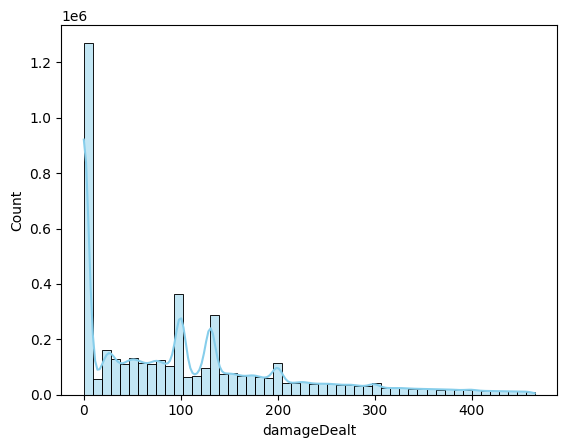

In [40]:
sns.histplot(df['damageDealt'], kde=True, bins=50, color='skyblue')

In [41]:
continuous_cols = [
    'damageDealt', 'longestKill', 'matchDuration',
    'rideDistance', 'swimDistance', 'walkDistance', 'winPlacePerc'
]

minmax_scaler =MinMaxScaler()
df[continuous_cols] = minmax_scaler.fit_transform(df[continuous_cols])

df[continuous_cols].head()

,damageDealt,longestKill,matchDuration,rideDistance,swimDistance,walkDistance,winPlacePerc
0,0.000000,0.000000,0.411132,0.000000,0.0,0.052008,0.4444
1,0.196710,0.000000,0.709045,0.000007,1.0,0.304653,0.6400
2,0.146237,0.000000,0.418722,0.000000,0.0,0.034374,0.7755
3,0.070753,0.000000,0.493359,0.000000,0.0,0.043064,0.1667
4,0.215054,0.431475,0.485769,0.000000,0.0,0.010569,0.1875


In [42]:
df

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,normal-duo,normal-duo-fpp,normal-solo,normal-solo-fpp,normal-squad,normal-squad-fpp,solo,solo-fpp,squad,squad-fpp
0,0,0,0.000000,0,0,0,60,1241,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.196710,0,0,0,57,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0.146237,0,0,0,47,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0.070753,0,0,0,75,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.215054,0,0,0,45,0,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.000000,0,0,0,74,1029,0,0,...,0,0,0,0,0,0,0,0,0,1
4446962,0,1,0.094946,0,0,0,69,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4446963,0,0,0.127011,0,0,0,66,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4446964,0,4,0.387957,1,1,2,11,0,2,1,...,0,0,0,0,0,0,0,0,0,1


In [43]:
from sklearn.model_selection import train_test_split
X = df.drop('winPlacePerc', axis=1)
y = df['winPlacePerc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Model Training and Evaluation
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Linear : Mean Squared Error: {mse}')
print(f'Linear : R-squared: {r2}')

Linear : Mean Squared Error: 0.014882217282227928
Linear : R-squared: 0.8424587942523402


In [45]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model with a specific number of estimators
rf_model = RandomForestRegressor( n_estimators=20,random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')

Random Forest Mean Squared Error: 0.007085260096441072
Random Forest R-squared: 0.9249963632796789


In [46]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost R-squared: {r2_xgb}')


XGBoost Mean Squared Error: 0.006770064755204257
XGBoost R-squared: 0.928332979938528


In [47]:
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting:")
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("R2:", r2_score(y_test, y_pred_gb))
print()


Gradient Boosting:
MSE: 0.009770161986633058
R2: 0.8965743430206323



In [55]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Decision Tree Mean Squared Error: {mse_dt}')
print(f'Decision Tree R-squared: {r2_dt}')


Decision Tree Mean Squared Error: 0.013801712219411632
Decision Tree R-squared: 0.8538968795311923
